In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection

In [42]:
# load dataset from from sklearn
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())
print(type(digits.data))
print(type(digits.images))
print(digits.images.shape)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1797, 8, 8)


In [54]:
def select_by_y(X, Y, selection):
    """
    select instances whose y is in selection
    Args:
        X: feature set
        Y: response(target) set
        selection: list of target value
    """
    N = len(X)
    new_X = []
    new_Y = []
    for i in range(N):
        if Y[i] in selection:
            new_X.append(X[i])
            new_Y.append(Y[i])
    return np.asarray(new_X),np.asarray(new_Y)

# select instances whose target are "1" and "7"
X_all, Y_all = select_by_y(digits.data, digits.target, [1, 7])
print("the numebr of instances is", len(X_all))

# split data set into training data and test data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_all, Y_all, test_size=0.4, random_state=0)
print("number of instances in traning data:", len(X_train))
print("number of instances in test data:", len(X_test))

the numebr of instances is 361
number of instances in traning data: 216
number of instances in test data: 145


## 3.1 Dimension Reduction
* choose two pixels that seem to have a big influence
* come up with some clever combination of the 64 original pixel values into 2 features

In [57]:
X_train_1, _ = select_by_y(X_train, Y_train, [1])
X_train_7, _ = select_by_y(X_train, Y_train, [7])

# calculate the mean of all instances of 1 and 7 respectively
mean_1 = np.mean(X_train_1, axis=0)
mean_7 = np.mean(X_train_7, axis=0)

# mean_1_image = mean_1.reshape((8,8))
# mean_7_image = mean_7.reshape((8,8))
# def show_image(image):
#     plt.figure()
#     plt.gray()
#     plt.imshow(image, interpolation="nearest")
#     plt.show()
# show_image(mean_1_image)
# show_image(mean_7_image)

# select the most important K dimensions
def topK_important_dimension(mean_a, mean_b, K):
    N = len(mean_a)
    assert K<=N
    return np.argsort(np.absolute(np.subtract(mean_a, mean_b)))[N-K:]

dims = topK_important_dimension(mean_1, mean_7, 2)

def reduce_dim(X):
    N = len(X)
    return X[:,dims] # take the most 2 important dimensions

X_train = reduce_dim(X_train)
X_train_1 = reduce_dim(X_train_1)
X_train_7 = reduce_dim(X_train_7)
#print(X_train)


## 3.2 Scatterplot

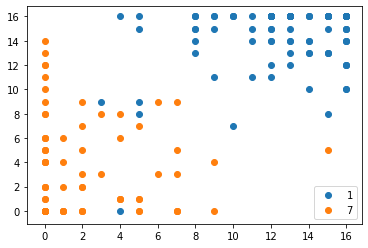

In [69]:
plt.scatter(X_train_1[:,0].transpose(), X_train_1[:,1].transpose(), label="1")
plt.scatter(X_train_7[:,0].transpose(), X_train_7[:,1].transpose(), label="7")
plt.legend()
plt.show()